# UNet Performance

unet_sigmoid_None_lr_0-001_bs_20_adam


2022-02-18 09:24:13.271955: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 209715200 exceeds 10% of free system memory.
2022-02-18 09:24:13.566916: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 209715200 exceeds 10% of free system memory.
2022-02-18 09:24:13.960358: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-18 09:24:14.070235: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2594055000 Hz
2022-02-18 09:24:16.670160: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.
2022-02-18 09:24:16.941118: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.
2022-02-18 09:24:17.312866: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 33554432 exceeds 10% of free system memory.


25/25 [==============================] - 122s 5s/step - loss: 0.0398 - accuracy: 0.9872
Accuracy (TEST) =  98.71873259544373 %
IoU socre is:  0.9788332463445805


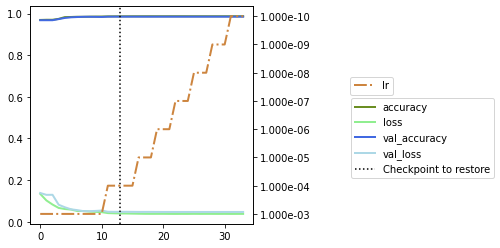

unet_sigmoid_None_lr_0-001_bs_32_rmsprop
25/25 [==============================] - 120s 5s/step - loss: 0.0394 - accuracy: 0.9871
Accuracy (TEST) =  98.70663285255432 %
IoU socre is:  0.9785939388880123


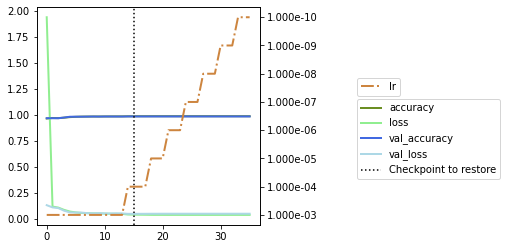

unet_relu_None_lr_0-001_bs_20_rmsprop
25/25 [==============================] - 127s 5s/step - loss: 0.0390 - accuracy: 0.9877
Accuracy (TEST) =  98.76866936683655 %
IoU socre is:  0.9798093342953043


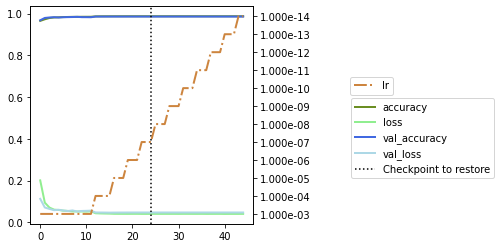

unet_relu_None_lr_0-0005_bs_20_adam
25/25 [==============================] - 119s 5s/step - loss: 0.0563 - accuracy: 0.9820
Accuracy (TEST) =  98.20430278778076 %
IoU socre is:  0.9685632071470955


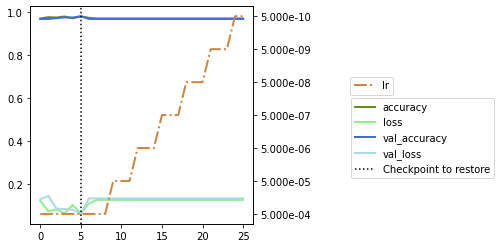

unet_sigmoid_None_lr_0-0005_bs_20_adam
25/25 [==============================] - 119s 5s/step - loss: 0.0430 - accuracy: 0.9865
Accuracy (TEST) =  98.6534595489502 %
IoU socre is:  0.9775493412305353


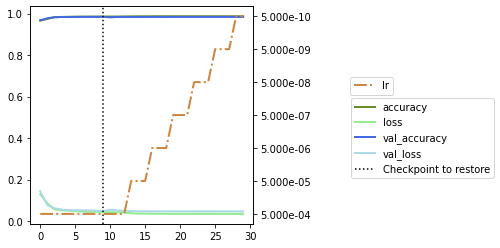

unet_sigmoid_None_lr_0-001_bs_20_rmsprop
25/25 [==============================] - 121s 5s/step - loss: 0.0382 - accuracy: 0.9875
Accuracy (TEST) =  98.74881505966187 %
IoU socre is:  0.9794166910968949


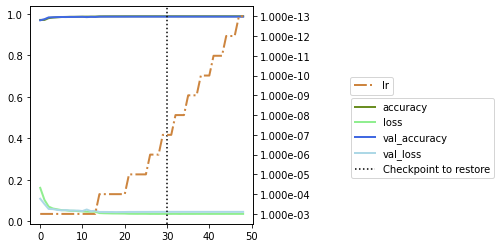

unet_relu_None_lr_0-001_bs_20_adam
25/25 [==============================] - 127s 5s/step - loss: 0.1241 - accuracy: 0.9709
Accuracy (TEST) =  97.08572626113892 %
IoU socre is:  0.9471288745636477


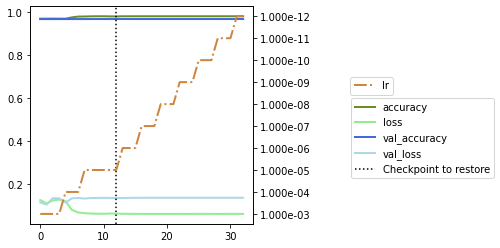

unet_sigmoid_None_lr_0-001_bs_32_adam
25/25 [==============================] - 126s 5s/step - loss: 0.0383 - accuracy: 0.9868
Accuracy (TEST) =  98.68481159210205 %
IoU socre is:  0.9781183336490045


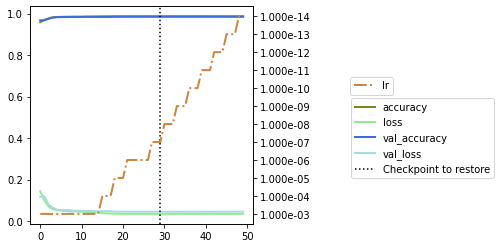

unet_sigmoid_None_lr_0-0005_bs_32_rmsprop
25/25 [==============================] - 153s 6s/step - loss: 0.0389 - accuracy: 0.9872
Accuracy (TEST) =  98.71805310249329 %
IoU socre is:  0.9788236863785178


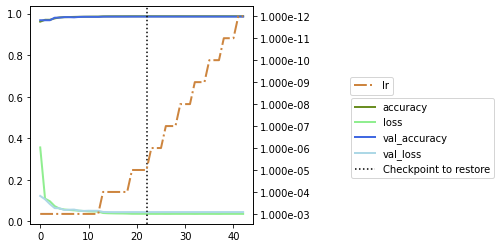

unet_relu_None_lr_0-0005_bs_32_rmsprop
25/25 [==============================] - 151s 6s/step - loss: 0.0385 - accuracy: 0.9873
Accuracy (TEST) =  98.7271249294281 %
IoU socre is:  0.9789966763003571


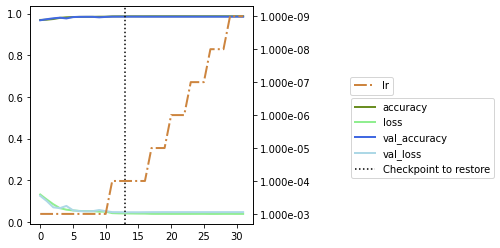

unet_relu_None_lr_0-0005_bs_32_adam
25/25 [==============================] - 132s 5s/step - loss: 0.0548 - accuracy: 0.9830
Accuracy (TEST) =  98.30281138420105 %
IoU socre is:  0.9705900648490442


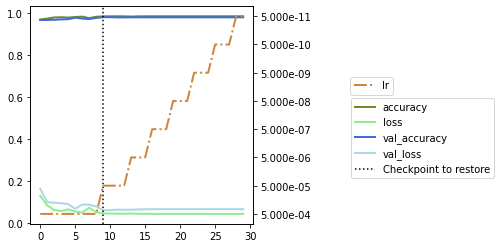

unet_sigmoid_None_lr_0-0005_bs_32_adam
25/25 [==============================] - 152s 6s/step - loss: 0.0405 - accuracy: 0.9868
Accuracy (TEST) =  98.68460893630981 %
IoU socre is:  0.9781090418045733


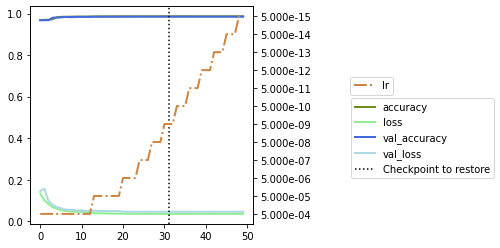

unet_relu_None_lr_0-001_bs_32_adam
25/25 [==============================] - 127s 5s/step - loss: 0.0569 - accuracy: 0.9819
Accuracy (TEST) =  98.19485545158386 %
IoU socre is:  0.9684913280584468


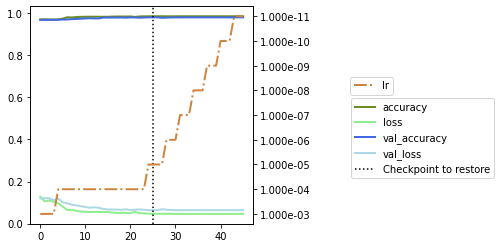

unet_sigmoid_None_lr_0-0005_bs_20_rmsprop
25/25 [==============================] - 126s 5s/step - loss: 0.0390 - accuracy: 0.9871
Accuracy (TEST) =  98.71494770050049 %
IoU socre is:  0.9787526617106389


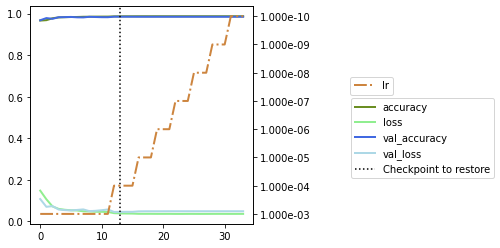

In [3]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from dataset import dataset
from tensorflow.keras.models import load_model
import numpy as np
ds = dataset.Dataset("threshold")
X_test, y_test = ds.get_dataset_segmentation(True)

dirs = os.listdir("machine_learning/checkpoints/")

def calculate_jaccard_similarity(y_test, y_pred):
    num = 0
    for i,j in enumerate(y_test):
        if j == y_pred[i]:
            num += 1
    den = len(y_pred) + len(y_test) - num
    return num/den

for d in dirs:
    if "unet" in d:
        print(d)
        
        model = load_model("machine_learning/checkpoints/"+d)
        _, acc = model.evaluate(X_test, y_test)
        print("Accuracy (TEST) = ", (acc * 100.0), "%")
        
        # IOU
        y_pred = model.predict(X_test)
        y_pred_thresholded = (y_pred > 0.5).ravel()
        
        #intersection = np.logical_and(y_test, y_pred_thresholded)
        #union = np.logical_or(y_test, y_pred_thresholded)
        iou_score = calculate_jaccard_similarity((y_test > 0.5).ravel(), y_pred_thresholded)#np.sum(intersection) / np.sum(union)
        print("IoU socre is: ", iou_score)
        
        
        logger = pd.read_csv("machine_learning/checkpoints/"+d+"/logger.csv")

        with open("machine_learning/checkpoints/"+d+"/scheduler.txt") as f:
            scheduler_tmp = f.readlines()
        scheduler = [] 
        for k in scheduler_tmp:
            scheduler.append(format(float(k.split("\t")[1].split("\n")[0]),".3e"))
        logger["lr"] = scheduler
        
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), constrained_layout=False)
        tmp = d.split("_")
        #title = "{} lr {} bs {} {}".format(tmp[1], tmp[4], tmp[6], tmp[7])
        #fig.suptitle(title, fontsize=16)
        ax.plot(list(logger["epoch"]), list(logger["accuracy"]), label='accuracy', linewidth=2, color="olivedrab")
        ax.plot(list(logger["epoch"]), list(logger["loss"]), label = "loss", linewidth=2, color="lightgreen")
        ax.plot(list(logger["epoch"]), list(logger["val_accuracy"]), label = "val_accuracy", linewidth=2, color="royalblue")
        ax.plot(list(logger["epoch"]), list(logger["val_loss"]), label = "val_loss", linewidth=2, color="lightblue")
        ax.axvline(x = list(logger["val_accuracy"]).index(max(list(logger["val_accuracy"]))), color = 'black', label = 'Checkpoint to restore', linestyle=":")
        ax11 = ax.twinx()
        ax11.plot(list(logger["epoch"]), list(logger["lr"]), label = "lr", linewidth=2, color="peru", linestyle="-.")
        l1 = ax.legend(bbox_to_anchor = (2.1, 0.6))
        l2 = ax11.legend(bbox_to_anchor = (1.65, 0.7))
        #plt.savefig("img_for_thesis/"+d+".jpg", bbox_extra_artists=(l1,l2,), bbox_inches='tight')
        plt.show()

# InceptionV3 Performance

### InceptionV3 with threshold method.

2022-02-19 12:34:01.707706: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-19 12:34:01.707777: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-19 12:34:19.367311: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-19 12:34:19.393696: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-19 12:34:19.407965: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-19 12:34:19.408134: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running 

0
0
inception_v3_sigmoid_threshold_lr_0-003_bs_20_4x128_II_train_lr_1e-05_adam


2022-02-19 12:35:22.468483: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-19 12:35:22.512866: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2594245000 Hz


5/5 [==============================] - 47s 9s/step - loss: 0.4123 - accuracy: 0.8667
Accuracy (TEST) =  86.66666746139526 %


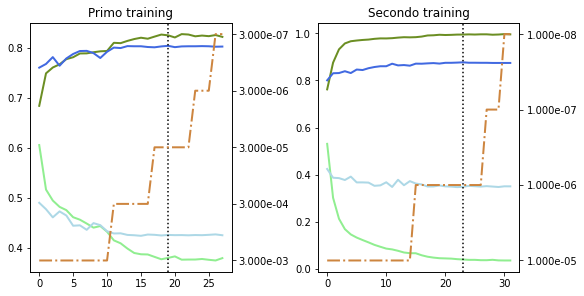

inception_v3_sigmoid_threshold_lr_0-001_bs_20_4x128_II_train_lr_1e-05_adam
5/5 [==============================] - 39s 8s/step - loss: 0.4127 - accuracy: 0.8000
Accuracy (TEST) =  80.0000011920929 %


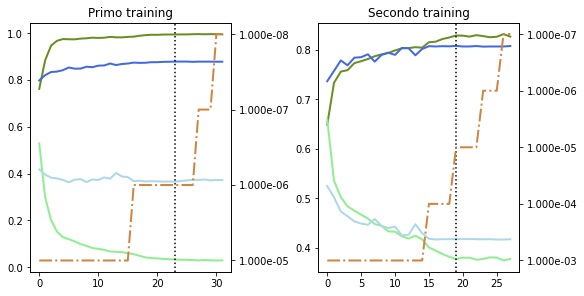

inception_v3_tanh_threshold_lr_0-001_bs_20_4x128_II_train_lr_1e-05_rmsprop
5/5 [==============================] - 40s 7s/step - loss: 0.5804 - accuracy: 0.7867
Accuracy (TEST) =  78.66666913032532 %


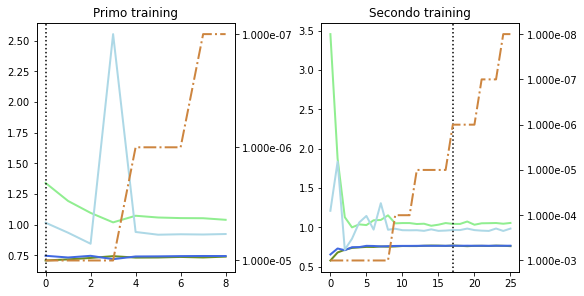

inception_v3_relu_threshold_lr_0-001_bs_20_4x128_II_train_lr_1e-05_rmsprop
5/5 [==============================] - 42s 8s/step - loss: 0.7356 - accuracy: 0.7800
Accuracy (TEST) =  77.99999713897705 %


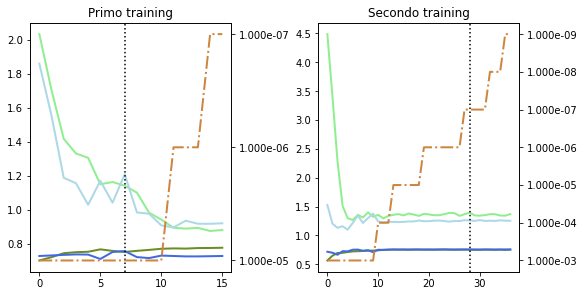

inception_v3_tanh_threshold_lr_0-001_bs_20_frozen_4x128_II_train_lr_1e-05
5/5 [==============================] - 44s 8s/step - loss: 0.4790 - accuracy: 0.8867
Accuracy (TEST) =  88.66666555404663 %


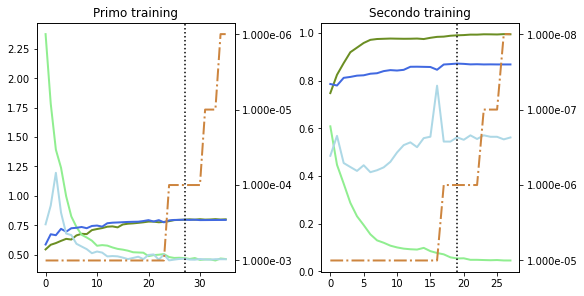

inception_v3_sigmoid_threshold_lr_0-001_bs_20_4x128_II_train_lr_1e-05
5/5 [==============================] - 47s 9s/step - loss: 0.2509 - accuracy: 0.9267
Accuracy (TEST) =  92.66666769981384 %


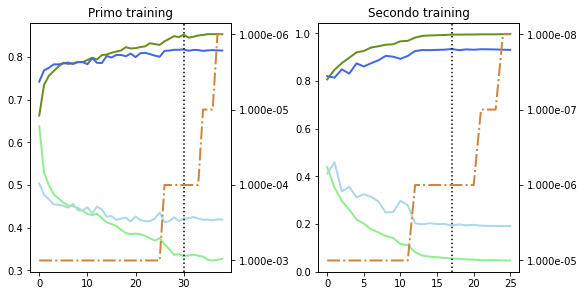

inception_v3_sigmoid_threshold_lr_0-001_bs_20_4x128_II_train_lr_1e-05_rmsprop
5/5 [==============================] - 43s 8s/step - loss: 0.4365 - accuracy: 0.8067
Accuracy (TEST) =  80.66666722297668 %


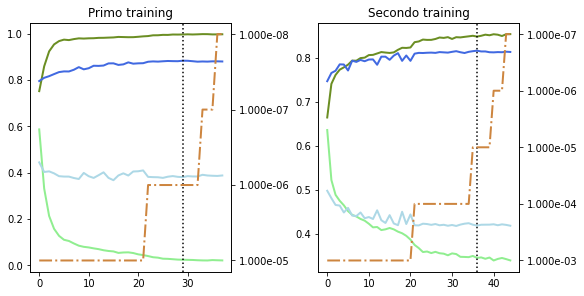

inception_v3_sigmoid_threshold_lr_0-0007_bs_20_4x128_II_train_lr_1e-05
5/5 [==============================] - 46s 9s/step - loss: 0.4289 - accuracy: 0.8733
Accuracy (TEST) =  87.33333349227905 %


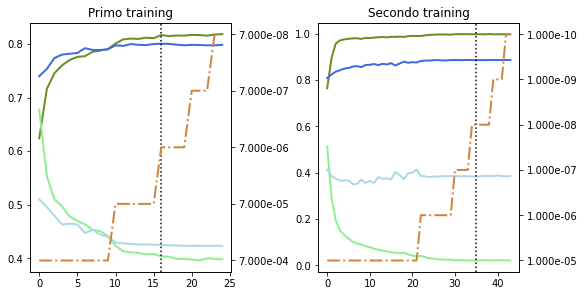

inception_v3_relu_threshold_lr_0-001_bs_20_4x128_II_train_lr_1e-05_adam
5/5 [==============================] - 47s 9s/step - loss: 1.0944 - accuracy: 0.7867
Accuracy (TEST) =  78.66666913032532 %


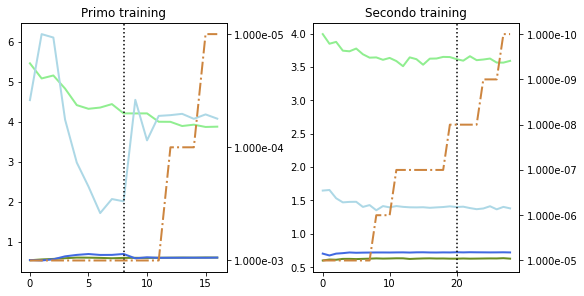

inception_v3_sigmoid_threshold_lr_0-001_bs_20_4x128_II_train_lr_3e-05
5/5 [==============================] - 48s 9s/step - loss: 0.4971 - accuracy: 0.9200
Accuracy (TEST) =  92.00000166893005 %


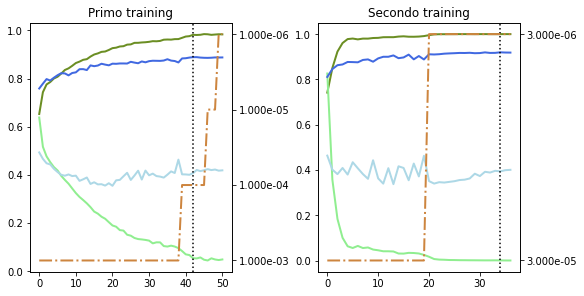

inception_v3_tanh_threshold_lr_0-001_bs_20_4x128_II_train_lr_1e-05_adagrad
5/5 [==============================] - 48s 9s/step - loss: 0.7600 - accuracy: 0.5400
Accuracy (TEST) =  54.00000214576721 %


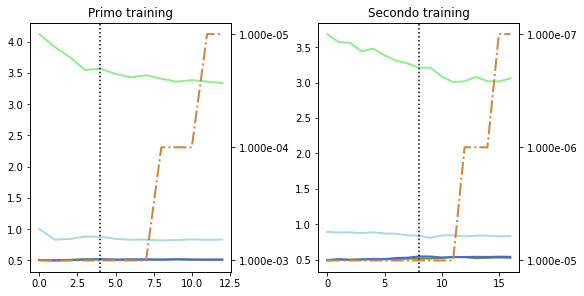

inception_v3_sigmoid_threshold_lr_0-001_bs_20_4x128_II_train_lr_1e-05_adagrad
5/5 [==============================] - 46s 9s/step - loss: 0.4946 - accuracy: 0.7733
Accuracy (TEST) =  77.33333110809326 %


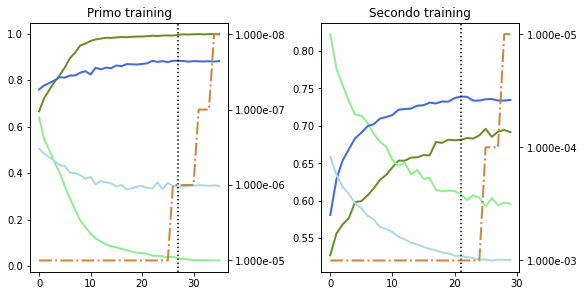

inception_v3_relu_threshold_lr_0-001_bs_20_4x128_II_train_lr_1e-05_adagrad
5/5 [==============================] - 53s 10s/step - loss: 1.4526 - accuracy: 0.5667
Accuracy (TEST) =  56.66666626930237 %


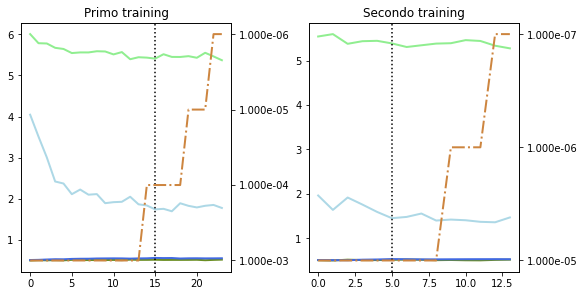

inception_v3_sigmoid_threshold_lr_0-0007_bs_20_4x128_II_train_lr_1e-05_adam
5/5 [==============================] - 43s 8s/step - loss: 0.4289 - accuracy: 0.8733
Accuracy (TEST) =  87.33333349227905 %


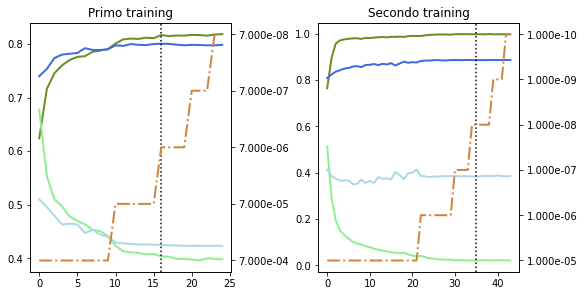

inception_v3_sigmoid_threshold_lr_0-003_bs_20_4x128_II_train_lr_1e-05
5/5 [==============================] - 43s 8s/step - loss: 0.4123 - accuracy: 0.8667
Accuracy (TEST) =  86.66666746139526 %


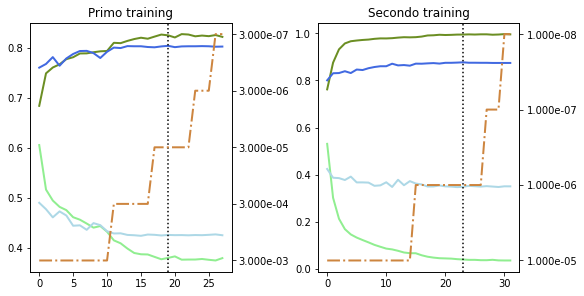

In [1]:
import os
import pandas as pd
from dataset import dataset
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

ds = dataset.Dataset("threshold")
X_test, y_test,_ = ds.get_dataset_classification("inception_v3",True, False)

tmp = os.listdir("machine_learning/checkpoints/")
dirs = []
for i, d in enumerate(tmp):
    if "II" in d:
        dirs.append(d)

for d in dirs:
    if "inception" in d:
        print(d)
        tmp = os.listdir("machine_learning/checkpoints/"+d)
        model = load_model("machine_learning/checkpoints/"+d+"/"+tmp[1])
        _, acc = model.evaluate(X_test, y_test)
        print("Accuracy (TEST) = ", (acc * 100.0), "%")
        
        logger_I_train = pd.read_csv("machine_learning/checkpoints/"+d+"/"+tmp[0]+"/logger.csv")
        with open("machine_learning/checkpoints/"+d+"/"+tmp[0]+"/scheduler.txt") as f:
            scheduler_I_train = f.readlines()

        logger_II_train = pd.read_csv("machine_learning/checkpoints/"+d+"/"+tmp[1]+"/logger.csv")
        with open("machine_learning/checkpoints/"+d+"/"+tmp[1]+"/scheduler.txt") as f:
            scheduler_II_train = f.readlines()
        scheduler = []
        for k in scheduler_I_train:
            scheduler.append(format(float(k.split("\t")[1].split("\n")[0]),".3e"))
        logger_I_train["lr"] = scheduler

        scheduler = []
        for k in scheduler_II_train:
            scheduler.append(format(float(k.split("\t")[1].split("\n")[0]),".3e"))
        logger_II_train["lr"] = scheduler

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
        #fig.suptitle(d, fontsize=16)
        ax1.set_title('Primo training')
        ax1.plot(list(logger_I_train["epoch"]), list(logger_I_train["accuracy"]), label='accuracy', linewidth=2, color="olivedrab")
        ax1.plot(list(logger_I_train["epoch"]), list(logger_I_train["loss"]), label = "loss", linewidth=2, color="lightgreen")
        ax1.plot(list(logger_I_train["epoch"]), list(logger_I_train["val_accuracy"]), label = "val_accuracy", linewidth=2, color="royalblue")
        ax1.plot(list(logger_I_train["epoch"]), list(logger_I_train["val_loss"]), label = "val_loss", linewidth=2, color="lightblue")
        ax1.axvline(x = list(logger_I_train["val_accuracy"]).index(max(list(logger_I_train["val_accuracy"]))), color = 'black', label = 'Checkpoint to restore', linestyle=":")
        ax11 = ax1.twinx()
        ax11.plot(list(logger_I_train["epoch"]), list(logger_I_train["lr"]), label = "lr", linewidth=2, color="peru", linestyle="-.")

        ax2.set_title('Secondo training')
        ax2.plot(list(logger_II_train["epoch"]), list(logger_II_train["accuracy"]), label='accuracy', linewidth=2, color="olivedrab")
        ax2.plot(list(logger_II_train["epoch"]), list(logger_II_train["loss"]), label = "loss", linewidth=2, color="lightgreen")
        ax2.plot(list(logger_II_train["epoch"]), list(logger_II_train["val_accuracy"]), label = "val_accuracy", linewidth=2, color="royalblue")
        ax2.plot(list(logger_II_train["epoch"]), list(logger_II_train["val_loss"]), label = "val_loss", linewidth=2, color="lightblue")
        ax2.axvline(x = list(logger_II_train["val_accuracy"]).index(max(list(logger_II_train["val_accuracy"]))), color = 'black', label = 'Checkpoint to restore', linestyle=":")

        ax22 = ax2.twinx()
        ax22.plot(list(logger_II_train["epoch"]), list(logger_II_train["lr"]), label = "lr", linewidth=2, color="peru", linestyle="-.")
        plt.savefig("img_for_thesis/"+d+".jpg")
        plt.show()

### InceptionV3 with UNet.

2022-02-21 12:38:07.017718: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-21 12:38:07.017781: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-21 12:38:26.892435: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-21 12:38:26.918855: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-21 12:38:26.933082: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-21 12:38:26.933276: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running 

0


2022-02-21 12:38:29.805139: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-21 12:38:29.881735: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2594285000 Hz


0
inception_v3_sigmoid_unet_lr_0-001_bs_20_4x128_II_train_lr_3e-05_adam
5/5 [==============================] - 41s 8s/step - loss: 0.3543 - accuracy: 0.9200
Accuracy (TEST) =  92.00000166893005 %


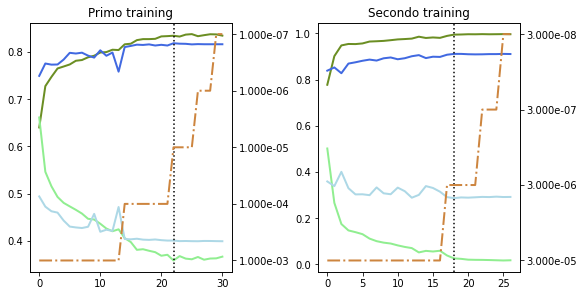

inception_v3_sigmoid_unet_lr_0-003_bs_20_4x128_II_train_lr_3e-05_adam
5/5 [==============================] - 44s 8s/step - loss: 0.4272 - accuracy: 0.8667
Accuracy (TEST) =  86.66666746139526 %


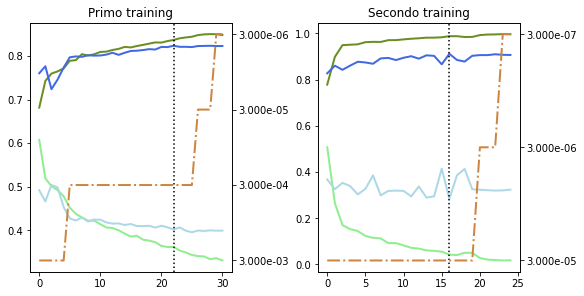

inception_v3_sigmoid_unet_lr_0-001_bs_20_4x128_II_train_lr_1e-05_rmsprop
5/5 [==============================] - 43s 8s/step - loss: 0.4131 - accuracy: 0.8533
Accuracy (TEST) =  85.33333539962769 %


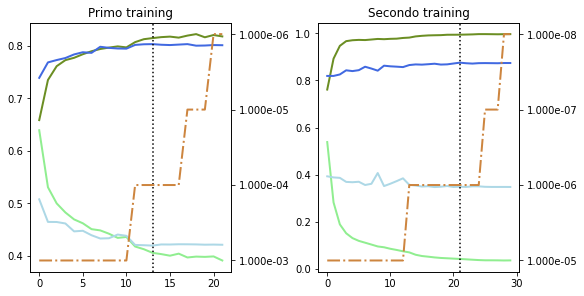

inception_v3_tanh_unet_lr_0-001_bs_20_4x128_II_train_lr_1e-05_adam
5/5 [==============================] - 43s 8s/step - loss: 0.5463 - accuracy: 0.8733
Accuracy (TEST) =  87.33333349227905 %


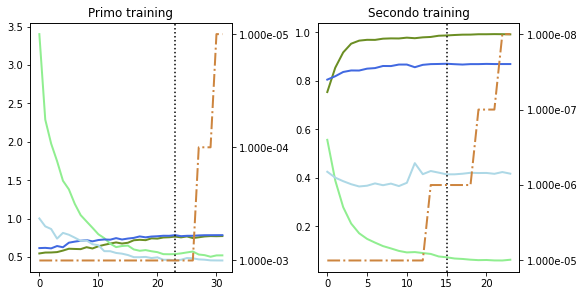

inception_v3_sigmoid_unet_lr_0-001_bs_32_4x128_II_train_lr_3e-05_adam
5/5 [==============================] - 42s 8s/step - loss: 0.5240 - accuracy: 0.7533
Accuracy (TEST) =  75.3333330154419 %


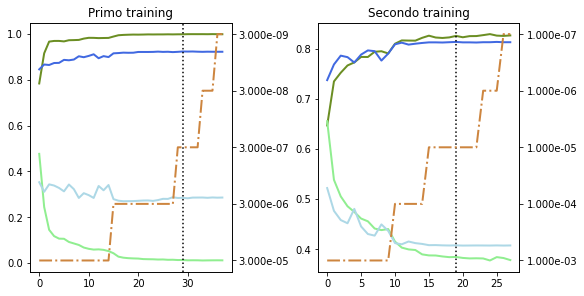

inception_v3_sigmoid_unet_lr_0-001_bs_20_4x128_II_train_lr_1e-05_adam
5/5 [==============================] - 43s 8s/step - loss: 0.4046 - accuracy: 0.8733
Accuracy (TEST) =  87.33333349227905 %


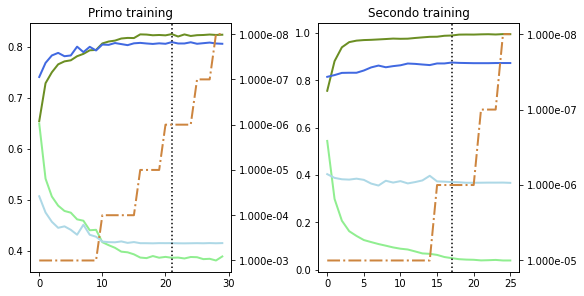

inception_v3_relu_unet_lr_0-001_bs_20_4x128_II_train_lr_1e-05_rmsprop
5/5 [==============================] - 43s 8s/step - loss: 0.8447 - accuracy: 0.8133
Accuracy (TEST) =  81.33333325386047 %


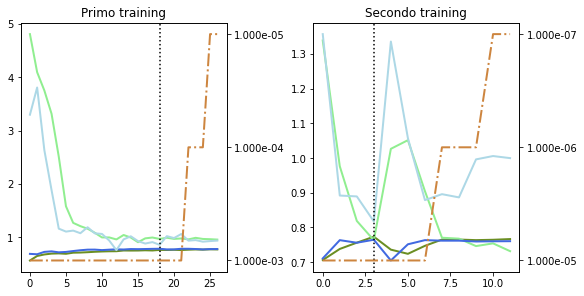

In [1]:
import os
import pandas as pd
from dataset import dataset
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

ds = dataset.Dataset("unet")
X_test, y_test,_ = ds.get_dataset_classification("inception_v3",True, False)

tmp = os.listdir("machine_learning/checkpoints/checkpoints_tesi_unet_delta_30/")
dirs = []
for i, d in enumerate(tmp):
    if "II" in d:
        dirs.append(d)

for d in dirs:
    if "inception" in d:
        print(d)
        tmp = os.listdir("machine_learning/checkpoints/checkpoints_tesi_unet_delta_30/"+d)
        model = load_model("machine_learning/checkpoints/checkpoints_tesi_unet_delta_30/"+d+"/"+tmp[1])
        _, acc = model.evaluate(X_test, y_test)
        print("Accuracy (TEST) = ", (acc * 100.0), "%")
        
        logger_I_train = pd.read_csv("machine_learning/checkpoints/checkpoints_tesi_unet_delta_30/"+d+"/"+tmp[0]+"/logger.csv")
        with open("machine_learning/checkpoints/checkpoints_tesi_unet_delta_30/"+d+"/"+tmp[0]+"/scheduler.txt") as f:
            scheduler_I_train = f.readlines()

        logger_II_train = pd.read_csv("machine_learning/checkpoints/checkpoints_tesi_unet_delta_30/"+d+"/"+tmp[1]+"/logger.csv")
        with open("machine_learning/checkpoints/checkpoints_tesi_unet_delta_30/"+d+"/"+tmp[1]+"/scheduler.txt") as f:
            scheduler_II_train = f.readlines()
        scheduler = []
        for k in scheduler_I_train:
            scheduler.append(format(float(k.split("\t")[1].split("\n")[0]),".3e"))
        logger_I_train["lr"] = scheduler

        scheduler = []
        for k in scheduler_II_train:
            scheduler.append(format(float(k.split("\t")[1].split("\n")[0]),".3e"))
        logger_II_train["lr"] = scheduler

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
        #fig.suptitle(d, fontsize=16)
        ax1.set_title('Primo training')
        ax1.plot(list(logger_I_train["epoch"]), list(logger_I_train["accuracy"]), label='accuracy', linewidth=2, color="olivedrab")
        ax1.plot(list(logger_I_train["epoch"]), list(logger_I_train["loss"]), label = "loss", linewidth=2, color="lightgreen")
        ax1.plot(list(logger_I_train["epoch"]), list(logger_I_train["val_accuracy"]), label = "val_accuracy", linewidth=2, color="royalblue")
        ax1.plot(list(logger_I_train["epoch"]), list(logger_I_train["val_loss"]), label = "val_loss", linewidth=2, color="lightblue")
        ax1.axvline(x = list(logger_I_train["val_accuracy"]).index(max(list(logger_I_train["val_accuracy"]))), color = 'black', label = 'Checkpoint to restore', linestyle=":")
        ax11 = ax1.twinx()
        ax11.plot(list(logger_I_train["epoch"]), list(logger_I_train["lr"]), label = "lr", linewidth=2, color="peru", linestyle="-.")

        ax2.set_title('Secondo training')
        ax2.plot(list(logger_II_train["epoch"]), list(logger_II_train["accuracy"]), label='accuracy', linewidth=2, color="olivedrab")
        ax2.plot(list(logger_II_train["epoch"]), list(logger_II_train["loss"]), label = "loss", linewidth=2, color="lightgreen")
        ax2.plot(list(logger_II_train["epoch"]), list(logger_II_train["val_accuracy"]), label = "val_accuracy", linewidth=2, color="royalblue")
        ax2.plot(list(logger_II_train["epoch"]), list(logger_II_train["val_loss"]), label = "val_loss", linewidth=2, color="lightblue")
        ax2.axvline(x = list(logger_II_train["val_accuracy"]).index(max(list(logger_II_train["val_accuracy"]))), color = 'black', label = 'Checkpoint to restore', linestyle=":")

        ax22 = ax2.twinx()
        ax22.plot(list(logger_II_train["epoch"]), list(logger_II_train["lr"]), label = "lr", linewidth=2, color="peru", linestyle="-.")
        plt.savefig("img_for_thesis/"+d+".jpg")
        plt.show()

# UNet vs Threshold

In [55]:
import glob
import cv2
from PIL import Image
from tensorflow.keras.utils import normalize
import numpy as np
from tensorflow.keras.models import load_model

image_directory = 'dataset/ISICArchive/UNet_vs_Threshold/img/'
mask_directory = 'dataset/ISICArchive/UNet_vs_Threshold/mask/'

image_names = glob.glob(image_directory + "*.tiff")
mask_names = glob.glob(mask_directory + "*.tiff")

def read_in_rgb(path):
    imm = cv2.imread(path)
    return cv2.cvtColor(imm, cv2.COLOR_BGR2RGB)

def unet_preprocessing(unet, path):
    img = read_in_rgb(path)
    img_resize = cv2.resize(img, (256,256), interpolation=cv2.INTER_CUBIC)
    img_to_gray = cv2.cvtColor(img_resize, cv2.COLOR_RGB2GRAY)
    img_norm = np.expand_dims(normalize(np.array(img_to_gray), axis=1), 2)#np.expand_dims(img_to_gray, 2)
    img_norm = img_norm[:, :, 0][:, :, None]
    to_input = np.expand_dims(img_norm, 0)
    prediction_mask = (unet.predict(to_input)[0, :, :, 0] > 0.2).astype(np.uint8)
    pred_mask = cv2.resize(prediction_mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
    return pred_mask

def cv_preprocessing(path):
    img = read_in_rgb(path)
    saturation = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)[..., 1]
    _, mask = cv2.threshold(saturation, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    mask = mask.astype(np.uint8)
    return mask

model = load_model("machine_learning/checkpoints/unet_relu_None_lr_0-001_bs_20_rmsprop")

def calculate_jaccard_similarity(y_test, y_pred):
    num = 0
    for i,j in enumerate(y_test):
        if j == y_pred[i]:
            num += 1
    den = len(y_pred) + len(y_test) - num
    return num/den

jaccard_threshold = 0
jaccard_unet = 0

for i, n in enumerate(image_names):
    if n.split("/")[-1] == mask_names[i].split("/")[-1]:
        threshold_mask = (cv_preprocessing(n)>0.5).ravel()
        unet_mask = (unet_preprocessing(model, n)>0.5).ravel()
        ground_truth = (cv2.imread(mask_names[i], 0)>0.5).ravel()#(mask_dataset[i]>0.5).ravel()

        jaccard_threshold += calculate_jaccard_similarity(ground_truth, threshold_mask)
        jaccard_unet += calculate_jaccard_similarity(ground_truth, unet_mask)

print(jaccard_threshold/len(image_names))
print(jaccard_unet/len(image_names))

0.8536332756327644
0.8622213253912446


# Test ISBI2017

In [2]:
import glob
import cv2
from PIL import Image
from tensorflow.keras.utils import normalize
import numpy as np
from tensorflow.keras.models import load_model

image_directory = 'dataset/ISICArchive/Segmentation/test_isbi2017/img/'
mask_directory = 'dataset/ISICArchive/Segmentation/test_isbi2017/mask/'

image_names = glob.glob(image_directory + "*.tiff")
mask_names = glob.glob(mask_directory + "*.tiff")

def read_in_rgb(path):
    imm = cv2.imread(path)
    return cv2.cvtColor(imm, cv2.COLOR_BGR2RGB)

def unet_preprocessing(unet, path):
    img = read_in_rgb(path)
    img_resize = cv2.resize(img, (256,256), interpolation=cv2.INTER_CUBIC)
    img_to_gray = cv2.cvtColor(img_resize, cv2.COLOR_RGB2GRAY)
    img_norm = np.expand_dims(normalize(np.array(img_to_gray), axis=1), 2)#np.expand_dims(img_to_gray, 2)
    img_norm = img_norm[:, :, 0][:, :, None]
    to_input = np.expand_dims(img_norm, 0)
    prediction_mask = (unet.predict(to_input)[0, :, :, 0] > 0.2).astype(np.uint8)
    pred_mask = cv2.resize(prediction_mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
    return pred_mask

def cv_preprocessing(path):
    img = read_in_rgb(path)
    saturation = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)[..., 1]
    _, mask = cv2.threshold(saturation, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    mask = mask.astype(np.uint8)
    return mask

model = load_model("machine_learning/checkpoints/unet_relu_None_lr_0-001_bs_20_rmsprop")

def calculate_jaccard_similarity(y_test, y_pred):
    num = 0
    for i,j in enumerate(y_test):
        if j == y_pred[i]:
            num += 1
    den = len(y_pred) + len(y_test) - num
    return num/den

jaccard_threshold = 0
jaccard_unet = 0

for i, n in enumerate(image_names):
    if i%10==0:
        print(i)
    if n.split("/")[-1] == mask_names[i].split("/")[-1]:
        threshold_mask = (cv_preprocessing(n)>0.5).ravel()
        unet_mask = (unet_preprocessing(model, n)>0.5).ravel()
        ground_truth = (cv2.imread(mask_names[i], 0)>0.5).ravel()#(mask_dataset[i]>0.5).ravel()

        jaccard_threshold += calculate_jaccard_similarity(ground_truth, threshold_mask)
        jaccard_unet += calculate_jaccard_similarity(ground_truth, unet_mask)

print(jaccard_threshold/len(image_names))
print(jaccard_unet/len(image_names))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
0.7422869768932786
0.8192564669995795


# Confusion Matrix

### InceptionV3 + Threshold

2022-02-21 16:00:21.968924: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-21 16:00:21.969019: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-21 16:00:37.340514: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-21 16:00:37.364504: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-21 16:00:37.364540: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-21 16:00:37.364572: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running 

0
0


2022-02-21 16:01:45.055745: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 160921800 exceeds 10% of free system memory.
2022-02-21 16:01:45.380641: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-21 16:01:45.477979: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2594310000 Hz
2022-02-21 16:01:47.818420: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 34329984 exceeds 10% of free system memory.
2022-02-21 16:01:47.818449: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 34329984 exceeds 10% of free system memory.
2022-02-21 16:01:47.818593: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 34329984 exceeds 10% of free system memory.
2022-02-21 16:01:47.818601: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 34329984 exceeds 10% of free system memory.


5/5 [==============================] - 42s 8s/step - loss: 0.2509 - accuracy: 0.9267
Accuracy (TEST) =  92.66666769981384 %
acc 0.9266666666666666
precision 0.9444444444444444
recall 0.9066666666666666
f1 0.9251700680272109
sens 0.9466666666666667


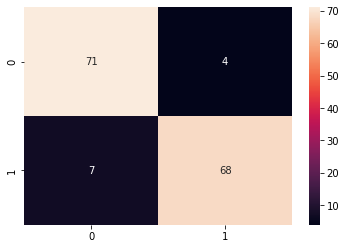

In [1]:
import os
import pandas as pd
from dataset import dataset
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

ds = dataset.Dataset("threshold")
X_test, y_test, name_imgs = ds.get_dataset_classification("inception_v3",True, False)

m1 = load_model("machine_learning/checkpoints/inception_v3_sigmoid_threshold_lr_0-001_bs_20_4x128_II_train_lr_1e-05/inception_v3_sigmoid_threshold_lr_1e-05_bs_20_unfrozen_4x128")
_, acc = m1.evaluate(X_test, y_test)
print("Accuracy (TEST) = ", (acc * 100.0), "%")
y_pred = m1.predict(X_test)
conf = confusion_matrix(y_test.ravel(), (y_pred > 0.5).ravel())

heatmap = sn.heatmap(conf, annot=True)
fig = heatmap.get_figure()
fig.savefig("img_for_thesis/conf_matrix_thereshold.jpg") 

tn, fp, fn, tp = conf.ravel()

p = (tp)/(tp+fp)
r = (tp)/(tp+fn)
print("acc {}".format((tp+tn)/(tp+fp+tn+fn)))
print("precision {}".format(p))
print("recall {}".format(r))
print("f1 {}".format((2*p*r)/(p+r)))
print("sens {}".format((tn)/(tn+fp)))

### InceptionV3 + UNet

0
0
5/5 [==============================] - 41s 8s/step - loss: 0.3543 - accuracy: 0.9200
Accuracy (TEST) =  92.00000166893005 %
acc 0.92
precision 0.9090909090909091
recall 0.9333333333333333
f1 0.9210526315789475
sens 0.9066666666666666


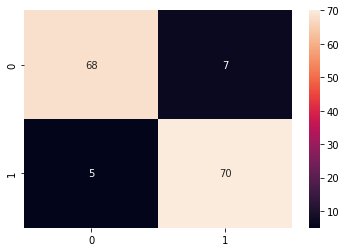

In [3]:
import os
import pandas as pd
from dataset import dataset
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

ds = dataset.Dataset("unet")
X_test, y_test, name_imgs = ds.get_dataset_classification("inception_v3",True, False)

m1 = load_model("machine_learning/checkpoints/checkpoints_tesi_unet_delta_30/inception_v3_sigmoid_unet_lr_0-001_bs_20_4x128_II_train_lr_3e-05_adam/inception_v3_sigmoid_unet_lr_3e-05_bs_20_unfrozen_4x128_adam")
_, acc = m1.evaluate(X_test, y_test)
print("Accuracy (TEST) = ", (acc * 100.0), "%")
y_pred = m1.predict(X_test)
conf = confusion_matrix(y_test.ravel(), (y_pred > 0.5).ravel())

heatmap = sn.heatmap(conf, annot=True)
fig = heatmap.get_figure()
fig.savefig("img_for_thesis/conf_matrix_unet.jpg") 

tn, fp, fn, tp = conf.ravel()

p = (tp)/(tp+fp)
r = (tp)/(tp+fn)
print("acc {}".format((tp+tn)/(tp+fp+tn+fn)))
print("precision {}".format(p))
print("recall {}".format(r))
print("f1 {}".format((2*p*r)/(p+r)))
print("sens {}".format((tn)/(tn+fp)))

# Test All Dataset

### InceptionV3 + Threshold

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
0
1000
2000
3000
acc 0.806164759954039
precision 0.46681723419041
recall 0.7681532304173814
f1 0.5807218500108061
sens 0.8142139354682487


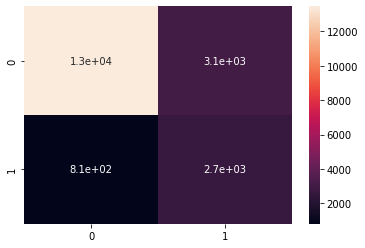

In [44]:
import os
import pandas as pd
from dataset import dataset
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import preprocess_image
import numpy as np

preprocessor = preprocess_image.Preprocessor()

m1 = load_model("machine_learning/checkpoints/inception_v3_sigmoid_threshold_lr_0-001_bs_20_4x128_II_train_lr_1e-05/inception_v3_sigmoid_threshold_lr_1e-05_bs_20_unfrozen_4x128")

path_b = "dataset/ISICArchive/Classification_totali/train/benign/"
all_b = os.listdir(path_b)


preds = []
labels = []
for j,i in enumerate(all_b):
    if j%1000 == 0:
        print(j)
    image = preprocessor.cv_preprocessing(path_b+i)
    pred = m1.predict(np.array([image]))[0][0]
    if pred > 0.5:
        tmp = 1
    else:
        tmp = 0
    preds.append(tmp)
    labels.append(0)
    with open("all_ds_delta_30_threshold.txt","a") as f:
        f.write("{}\t{}\t0\n".format(pred, i))

        
path_m = "dataset/ISICArchive/Classification_totali/train/malignant/"
all_m = os.listdir(path_m)

for j,i in enumerate(all_m):
    if j%1000 == 0:
        print(j)
    image = preprocessor.cv_preprocessing(path_m+i)
    pred = m1.predict(np.array([image]))[0][0]
    if pred > 0.5:
        tmp = 1
    else:
        tmp = 0
    preds.append(tmp)
    labels.append(1)
    with open("all_ds_delta_30_threshold.txt","a") as f:
        f.write("{}\t{}\t1\n".format(pred, i))


conf = confusion_matrix(labels, preds)

heatmap = sn.heatmap(conf, annot=True)
fig = heatmap.get_figure()
fig.savefig("img_for_thesis/conf_matrix_thereshold_all_ds.jpg") 

tn, fp, fn, tp = conf.ravel()

p = (tp)/(tp+fp)
r = (tp)/(tp+fn)
print("acc {}".format((tp+tn)/(tp+fp+tn+fn)))
print("precision {}".format(p))
print("recall {}".format(r))
print("f1 {}".format((2*p*r)/(p+r)))
print("sens {}".format((tn)/(tn+fp)))

### InceptionV3 + UNet

0


2022-02-22 19:32:53.424601: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-22 19:32:53.521638: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2594070000 Hz


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
0
1000
2000
3000
acc 0.7876804715991408
precision 0.43754152823920267
recall 0.7530017152658662
f1 0.5534776213490229
sens 0.7950239118590714


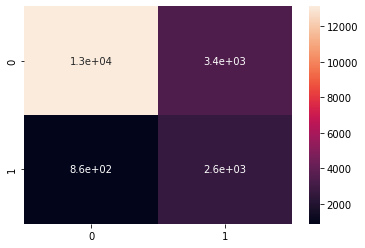

In [2]:
import os
import pandas as pd
from dataset import dataset
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import preprocess_image
import numpy as np

preprocessor = preprocess_image.Preprocessor()

m1 = load_model("machine_learning/checkpoints/checkpoints_tesi_unet_delta_30/inception_v3_sigmoid_unet_lr_0-001_bs_20_4x128_II_train_lr_3e-05_adam/inception_v3_sigmoid_unet_lr_3e-05_bs_20_unfrozen_4x128_adam")    

path_b = "dataset/ISICArchive/Classification_totali/train/benign/"
all_b = os.listdir(path_b)


preds = []
labels = []
for j,i in enumerate(all_b):
    if j%1000 == 0:
        print(j)
    image = preprocessor.cv_preprocessing(path_b+i)
    pred = m1.predict(np.array([image]))[0][0]
    if pred > 0.5:
        tmp = 1
    else:
        tmp = 0
    preds.append(tmp)
    labels.append(0)
    with open("all_ds_delta_30_unet.txt","a") as f:
        f.write("{}\t{}\t0\n".format(pred, i))

        
path_m = "dataset/ISICArchive/Classification_totali/train/malignant/"
all_m = os.listdir(path_m)

for j,i in enumerate(all_m):
    if j%1000 == 0:
        print(j)
    image = preprocessor.cv_preprocessing(path_m+i)
    pred = m1.predict(np.array([image]))[0][0]
    if pred > 0.5:
        tmp = 1
    else:
        tmp = 0
    preds.append(tmp)
    labels.append(1)
    with open("all_ds_delta_30_unet.txt","a") as f:
        f.write("{}\t{}\t1\n".format(pred, i))


conf = confusion_matrix(labels, preds)

heatmap = sn.heatmap(conf, annot=True)
fig = heatmap.get_figure()
fig.savefig("img_for_thesis/conf_matrix_unet_all_ds.jpg") 

tn, fp, fn, tp = conf.ravel()

p = (tp)/(tp+fp)
r = (tp)/(tp+fn)
print("acc {}".format((tp+tn)/(tp+fp+tn+fn)))
print("precision {}".format(p))
print("recall {}".format(r))
print("f1 {}".format((2*p*r)/(p+r)))
print("sens {}".format((tn)/(tn+fp)))

2022-02-28 19:28:34.107372: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-28 19:28:34.107440: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-28 19:28:55.079982: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-28 19:28:55.104220: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-28 19:28:55.104296: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-28 19:28:55.104381: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running 

0


2022-02-28 19:29:57.882733: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-28 19:29:58.017341: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2594045000 Hz


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


Premature end of JPEG file
Premature end of JPEG file


17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
0
1000
2000
3000
4000
5000
24300 3570 844 4754
acc 0.8681128241902714
precision 0.571119654012494
recall 0.8492318685244731
f1 0.6829478523200689
sens 0.8719052744886975
23482 4388 888 4710
acc 0.8423568782120234
precision 0.5176961969663663
recall 0.8413719185423365
f1 0.640990745781165
sens 0.8425547183351274


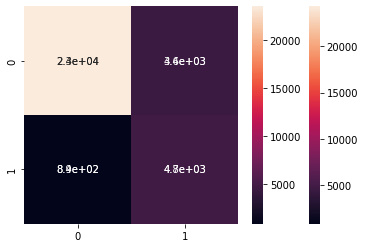

In [1]:
import os
import pandas as pd
from dataset import dataset
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import preprocess_image
import numpy as np

preprocessor = preprocess_image.Preprocessor()
preprocessor.delta = 30

m1 = load_model("machine_learning/checkpoints/inception_v3_sigmoid_threshold_lr_0-001_bs_20_4x128_II_train_lr_1e-05/inception_v3_sigmoid_threshold_lr_1e-05_bs_20_unfrozen_4x128")
m2 = load_model("machine_learning/checkpoints/checkpoints_tesi_unet_delta_30/inception_v3_sigmoid_unet_lr_0-001_bs_20_4x128_II_train_lr_3e-05_adam/inception_v3_sigmoid_unet_lr_3e-05_bs_20_unfrozen_4x128_adam")

path_b = "dataset/ISICArchive/Classification_totali/train/benign/"
all_b = os.listdir(path_b)


preds_m1 = []
preds_m2 = []
labels = []
for j,i in enumerate(all_b):
    if j%1000 == 0:
        print(j)
    image = preprocessor.cv_preprocessing(path_b+i)
    pred = m1.predict(np.array([image]))[0][0]
    if pred > 0.5:
        tmp = 1
    else:
        tmp = 0
    preds_m1.append(tmp)
    with open("all_ds_delta_50_threshold_final.txt","a") as f:
        f.write("{}\t{}\t\n".format(pred, i))
    
    image = preprocessor.unet_preprocessing(path_b+i)
    pred = m2.predict(np.array([image]))[0][0]
    if pred > 0.5:
        tmp = 1
    else:
        tmp = 0
    preds_m2.append(tmp)
    
    labels.append(0)
    with open("all_ds_delta_50_unet_final.txt","a") as f:
        f.write("{}\t{}\t\n".format(pred, i))

        
path_m = "dataset/ISICArchive/Classification_totali/train/malignant/"
all_m = os.listdir(path_m)

for j,i in enumerate(all_m):
    if j%1000 == 0:
        print(j)
    image = preprocessor.cv_preprocessing(path_m+i)
    pred = m1.predict(np.array([image]))[0][0]
    if pred > 0.5:
        tmp = 1
    else:
        tmp = 0
    preds_m1.append(tmp)
    
    with open("all_ds_delta_50_threshold_final.txt","a") as f:
        f.write("{}\t{}\t\n".format(pred, i))
    
    image = preprocessor.unet_preprocessing(path_m+i)
    pred = m2.predict(np.array([image]))[0][0]
    if pred > 0.5:
        tmp = 1
    else:
        tmp = 0
    preds_m2.append(tmp)
    
    
    labels.append(1)
    with open("all_ds_delta_50_unet_final.txt","a") as f:
        f.write("{}\t{}\t\n".format(pred, i))


conf = confusion_matrix(labels, preds_m1)

heatmap = sn.heatmap(conf, annot=True)
fig = heatmap.get_figure()
fig.savefig("img_for_thesis/conf_matrix_threshold_all_ds_delta_50_final.jpg") 

tn, fp, fn, tp = conf.ravel()
print(tn, fp, fn, tp)
p = (tp)/(tp+fp)
r = (tp)/(tp+fn)
print("acc {}".format((tp+tn)/(tp+fp+tn+fn)))
print("precision {}".format(p))
print("recall {}".format(r))
print("f1 {}".format((2*p*r)/(p+r)))
print("sens {}".format((tn)/(tn+fp)))


conf = confusion_matrix(labels, preds_m2)

heatmap = sn.heatmap(conf, annot=True)
fig = heatmap.get_figure()
fig.savefig("img_for_thesis/conf_matrix_unet_all_ds_delta_50_final.jpg") 

tn, fp, fn, tp = conf.ravel()
print(tn, fp, fn, tp)
p = (tp)/(tp+fp)
r = (tp)/(tp+fn)
print("acc {}".format((tp+tn)/(tp+fp+tn+fn)))
print("precision {}".format(p))
print("recall {}".format(r))
print("f1 {}".format((2*p*r)/(p+r)))
print("sens {}".format((tn)/(tn+fp)))

In [7]:
l = []
p = []
while len(l)< (23482+4388):
    l.append(0)
while len(l)< (23482+4388)+(4710+888):
    l.append(1)
print(len(l))


while len(p)< (23482):
    p.append(0)
while len(p) < (23482 + 4388):
    p.append(1)
while len(p) < (23482+4388)+(4710):
    p.append(1)
while len(p)< (23482+4388)+(4710+888):
    p.append(0)
print(len(p))

33468
33468


2022-03-01 11:28:35.791076: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-01 11:28:35.791150: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


23482 4388 888 4710
acc 0.8423568782120234
precision 0.5176961969663663
recall 0.8413719185423365
f1 0.640990745781165
sens 0.8425547183351274


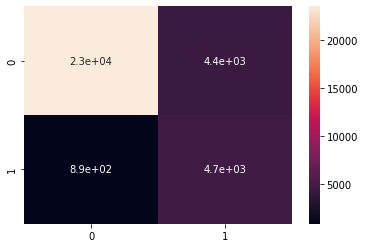

In [8]:
import os
import pandas as pd
from dataset import dataset
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import preprocess_image
import numpy as np


conf = confusion_matrix(l, p)

heatmap = sn.heatmap(conf, annot=True)
fig = heatmap.get_figure()
fig.savefig("img_for_thesis/conf_matrix_unet_all_ds_delta_30_final.jpg") 

tn, fp, fn, tp = conf.ravel()
print(tn, fp, fn, tp)
p = (tp)/(tp+fp)
r = (tp)/(tp+fn)
print("acc {}".format((tp+tn)/(tp+fp+tn+fn)))
print("precision {}".format(p))
print("recall {}".format(r))
print("f1 {}".format((2*p*r)/(p+r)))
print("sens {}".format((tn)/(tn+fp)))